# Naive Bayes Algorithm

## Table of Contents:
1. [Background reading](#background-reading)
2. [Essence of Data](#essence-of-data)
3. [Example Codes](#example-codes)

## Background reading:

**Suggested Reading:**

*Intro to Statistical Learning*: Book Sections: 4.4.4 Naive Bayes

**Optional Reading:**

*Ethical Algorithm*: Chapter 1, Algorithmic Privacy, A Bad Solution, (Page 26-31)

## Dataset:

The example on github uses the Cleveland Heart Disease data set from UCI
https://archive.ics.uci.edu/ml/datasets/Heart+Disease


**14 attributes used:**

1. (age)  
2. (sex)  (1 = male, 0 = female)
3. (cp) = presence of chest pain (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
4. (restbps) = resting blood pressure in mmHg
5. (chol) = cholesterol level in mg/dL
6. (fbs) = fasting blood sugar > 120 mg/dl (1 = yes , 0 = no)
7. (restecg)  = resting electrocardiographic level (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy)
8. (thalach)  = maximum heart rate achieved 
9. (exang)  = exercise induced angina (1 = yes; 0 = no) 
10. (oldpeak)  = ST depression induced by exercise relative to rest 
11. (slope) = the slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
12. (ca)  = number of major vessels colored by fluoroscopy  (0-3)
13. (thal)  = (3 = normal; 6 = fixed defect; 7 = reversible defect)
14. (num) = diagnosis of heart disease (this is the class that we want to predict; 0 = no heart disease, 1 = heart disease)

**Classes:**
0 = the patient has no presence of heart disease
1= the patient has heart disease


## Essence of Data
**What is Naive Bayes?**

Naive Bayes is a probabilistic algorithm that can be used for classification or clustering. The model predicts the instance’s class based on the instance's attributes using conditional probabilities.

Example: Spam filters in email applications use Naive Bayes to decide if an email is spam or not.

# Types of Naive Bayes

There are three common types of Naive Bayes classifiers:

### 1. Gaussian Naive Bayes
   - **Use Case**: This is used when the features are **continuous** and follow a **normal (Gaussian) distribution**.
   - **Assumptions**: Each feature is assumed to follow a normal distribution.

   The probability density function for Gaussian Naive Bayes is:
   $$
   P(x_i|C_k) = \frac{1}{\sqrt{2 \pi \sigma_k^2}} \exp\left(-\frac{(x_i - \mu_k)^2}{2 \sigma_k^2}\right)
   $$
   where $ \mu_k $ and $ \sigma_k $ are the mean and variance of the features for class $ C_k $.

### 2. Multinomial Naive Bayes
   - **Use Case**: Used for **discrete count data**.
   - **Assumptions**: The features are drawn from a multinomial distribution.

   This model computes the likelihood as:
   $$
   P(x_i | C_k) = \frac{n_{C_k,x_i} + \alpha}{N_{C_k} + \alpha n}
   $$
   where $ n_{C_k,x_i} $ is the count of feature $ x_i $ in class $C_k $, $ N_{C_k} $ is the total count of features for class $ C_k $, and $ \alpha $ is a smoothing parameter.

### 3. Bernoulli Naive Bayes
   - **Use Case**: Designed for **binary/boolean features**.
   - **Assumptions**: Each feature is assumed to follow a Bernoulli distribution.

   For Bernoulli Naive Bayes, the likelihood is modeled as:
   $$
   P(x_i | C_k) = p_k^{x_i}(1 - p_k)^{1 - x_i}
   $$
   where $ p_k $ is the probability of feature $ x_i $ being present in class $ C_k $.

**How does Naive Bayes work?**

The algorithm predicts the class that the instance belongs to using Baye’s Theorem for conditional probabilities.

<div align = 'center'><font size = '24'>$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$</font></div>

Example: from the heart disease dataset

<div align = 'center'><font size = '4'>$P(heart\ disease|male)=\frac{P(male|heart\ disease)P(heart\ disease)}{P(male)}=\frac{\frac{114}{139}\times\frac{139}{303}}{\frac{206}{303}}=0.5534$</font></div>


**What assumptions are made?**

It is called “Naive” because it is assumed that all attributes are independent of each other.

**What are the issues that these assumptions can cause?**

All of the attributes are not necessarily independent of each other.
For example in the Cleveland Heart Disease dataset exercise induced angina can be correlated to the presence of stationary angina. Also, resting blood pressure and cholesterol levels are correlated. Bayesian Network (Bayes net) is a probabilistic graphical model that extends on capabilities of Naive Bayes by modeling specific dependencies between the attributes. In the most general form this is represented by a directed graph where each edge represents a conditional probability distribution between two attribute nodes. 

Related Articles:
Harvard Business Review: 10 Promising AI Applications in Health Care:

https://hbr.org/2018/05/10-promising-ai-applications-in-health-care?ab=at_art_art_1x4_s01 



# Example Codes

In [6]:
pip install numpy pandas scikit-learn matplotlib seaborn

  Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.5 MB 10.1 MB/s eta 0:00:01
   ------------- -------------------------- 3.9/11.5 MB 9.8 MB/s eta 0:00:01
   -------------------- ------------------- 6.0/11.5 MB 10.0 MB/s eta 0:00:01
   ---------------------------- ----------- 8.1/11.5 MB 9.9 MB/s eta 0:00:01
   ---------------------------------- ----- 10.0/11.5 MB 9.9 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 9.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.0 MB 10.1 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/11.0 MB 9.8 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.0 MB 10.0 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.0 MB 9.9 MB/s eta 0:00:01
   ----------

In [7]:
import numpy as np
import pandas as pd
import math
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest

In [8]:
#load file as a dataframe
#df = pd.read_csv('processed.cleveland.csv')
df = pd.read_csv('processed.cleveland.csv')
#df
df

,age,sex,chestpain,restbps,cholesterol,fastingbs,restecg,thalach,exerciseang,oldpeak,slope,ca,thal,heartdisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [9]:
#check descriptive statistics of dataset
df.describe()

,age,sex,chestpain,restbps,cholesterol,fastingbs,restecg,thalach,exerciseang,oldpeak,slope,ca,thal,heartdisease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.679868,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934878,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [10]:
#checking for null values
df.isna().sum()

age             0
sex             0
chestpain       0
restbps         0
cholesterol     0
fastingbs       0
restecg         0
thalach         0
exerciseang     0
oldpeak         0
slope           0
ca              0
thal            0
heartdisease    0
dtype: int64

In [11]:
#separate target attribute
target = df.heartdisease
predictors = df.drop('heartdisease', axis = 'columns')

(array([149.,  50.,  40.,  24.,  20.,  11.,   6.,   1.,   0.,   2.]),
 array([0.  , 0.62, 1.24, 1.86, 2.48, 3.1 , 3.72, 4.34, 4.96, 5.58, 6.2 ]),
 <BarContainer object of 10 artists>)

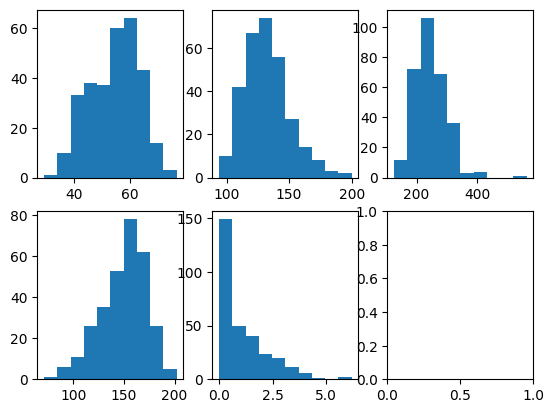

In [14]:
# Plot a histogram of each of the continous predictors. We will proceed with the assumption that each predictor follows a Gaussian distribution
# Some of the predictors are less likely to be Gaussian (oldpeak for example), so we should proceed with caution and keep in mind the assumptions we made when we go to interpret our results.
fig, ((p1, p2, p3), (p4, p5, p6)) = plt.subplots(nrows=2, ncols = 3)

p1.hist(predictors['age'])
p2.hist(predictors['restbps'])
p3.hist(predictors['cholesterol'])
p4.hist(predictors['thalach'])
p5.hist(predictors['oldpeak'])


In [15]:
#split data into 30% test and 70% training, using set random state for reproducibility

x_train, x_test, y_train, y_test =  train_test_split(predictors,target,test_size = 0.3, random_state = 18)

In [16]:
#number of instances in train set

len(x_train)

212

In [17]:
#number of instances in test set

len(x_test)

91

In [18]:
#train the model using the Gaussian model probabilities
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [19]:
#first 10 instances from the test set
x_test[:10]

,age,sex,chestpain,restbps,cholesterol,fastingbs,restecg,thalach,exerciseang,oldpeak,slope,ca,thal
199,59,1,1,160,273,0,2,125,0,0.0,1,0,3
192,43,1,4,132,247,1,2,143,1,0.1,2,2,7
246,58,1,4,100,234,0,0,156,0,0.1,1,1,7
257,76,0,3,140,197,0,1,116,0,1.1,2,0,3
268,40,1,4,152,223,0,0,181,0,0.0,1,0,7
140,59,1,2,140,221,0,0,164,1,0.0,1,0,3
302,38,1,3,138,175,0,0,173,0,0.0,1,1,3
18,48,0,3,130,275,0,0,139,0,0.2,1,0,3
41,40,1,1,140,199,0,0,178,1,1.4,1,0,7
103,71,0,3,110,265,1,2,130,0,0.0,1,1,3


In [20]:
# actual instances of heart disease for the first 10 instances from the test set
y_test[:10]

199    1
192    1
246    1
257    0
268    1
140    0
302    0
18     0
41     0
103    0
Name: heartdisease, dtype: int64

In [21]:
#models prediction of heart disease for the first 10 instances from the test set
model.predict(x_test[:10])
y_pred=model.predict(x_test)

In [22]:
# score the accuracy of the model's predictions
accuracy = model.score(x_test,y_test)*100

In [23]:
#print the accuracy
print('the accuracy of the model is {0}%'.format(accuracy))

the accuracy of the model is 75.82417582417582%


In [24]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[38, 11],
       [11, 31]])

Text(0.5, 427.9555555555555, 'Predicted Class')

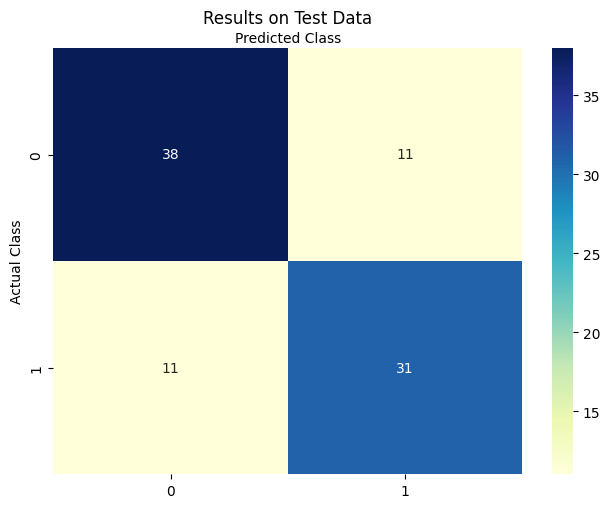

In [25]:
#heat map of accuracy - the model makes about the same number of type 1 as type 2 errors
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'YlGnBu', fmt='g')
ax.xaxis.set_label_position ('top')
plt.tight_layout()
plt.title('Results on Test Data')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

In [27]:
#Rerun the analysis only using continuous predictors for Gaussian Naive Bayes
#drop non-continuous predictors
predictors_cont = predictors.drop(['sex', 'chestpain', 'fastingbs', 'restecg', 'exerciseang', 'slope', 'ca', 'thal'], axis = 'columns')
predictors_cont 

,age,restbps,cholesterol,thalach,oldpeak
0,63,145,233,150,2.3
1,67,160,286,108,1.5
2,67,120,229,129,2.6
3,37,130,250,187,3.5
4,41,130,204,172,1.4
...,...,...,...,...,...
298,45,110,264,132,1.2
299,68,144,193,141,3.4
300,57,130,131,115,1.2
301,57,130,236,174,0.0


In [28]:
#split data into 30% test and 70% training, using set random state for reproducibility

x_train_cont, x_test_cont, y_train_cont, y_test_cont =  train_test_split(predictors_cont,target,test_size = 0.3, random_state = 18)

In [29]:
#train the model using the Gaussian model probabilities
model_cont = GaussianNB()
model_cont.fit(x_train_cont,y_train_cont)

GaussianNB()

In [30]:
#first 10 instances from the test set
x_test_cont[:10]

,age,restbps,cholesterol,thalach,oldpeak
199,59,160,273,125,0.0
192,43,132,247,143,0.1
246,58,100,234,156,0.1
257,76,140,197,116,1.1
268,40,152,223,181,0.0
140,59,140,221,164,0.0
302,38,138,175,173,0.0
18,48,130,275,139,0.2
41,40,140,199,178,1.4
103,71,110,265,130,0.0


In [31]:
# actual instances of heart disease for the first 10 instances from the test set
y_test_cont[:10]

199    1
192    1
246    1
257    0
268    1
140    0
302    0
18     0
41     0
103    0
Name: heartdisease, dtype: int64

In [32]:
#models prediction of heart disease for the first 10 instances from the test set
model_cont.predict(x_test_cont[:10])
y_pred=model_cont.predict(x_test_cont)

In [33]:
# score the accuracy of the model's predictions
accuracy_cont = model_cont.score(x_test_cont,y_test_cont)*100

In [34]:
#print the accuracy
print('the accuracy of the model with only the five continuous predictors is {0}%'.format(accuracy_cont))

the accuracy of the model with only the five continuous predictors is 63.73626373626373%


In [35]:
#Rerun the analysis only using discrete predictors for Multinomial Naive Bayes
#drop non-discrete predictors
predictors_disc = predictors.drop(['age', 'restbps', 'cholesterol', 'thalach', 'oldpeak'], axis = 'columns')


In [36]:
#split data into 30% test and 70% training, using set random state for reproducibility

x_train_disc, x_test_disc, y_train_disc, y_test_disc =  train_test_split(predictors_disc,target,test_size = 0.3, random_state = 18)

In [37]:
# actual instances of heart disease for the first 10 instances from the test set
y_test_disc[:10]

199    1
192    1
246    1
257    0
268    1
140    0
302    0
18     0
41     0
103    0
Name: heartdisease, dtype: int64

In [38]:
#train the model using the Multinomial model probabilities
model_disc = MultinomialNB()
model_disc.fit(x_train_disc, y_train_disc)

MultinomialNB()

In [30]:
#first 10 instances from the test set
x_test_disc[:10]

,sex,chestpain,fastingbs,restecg,exerciseang,slope,ca,thal
199,1,1,0,2,0,1,0,3
192,1,4,1,2,1,2,2,7
246,1,4,0,0,0,1,1,7
257,0,3,0,1,0,2,0,3
268,1,4,0,0,0,1,0,7
140,1,2,0,0,1,1,0,3
302,1,3,0,0,0,1,1,3
18,0,3,0,0,0,1,0,3
41,1,1,0,0,1,1,0,7
103,0,3,1,2,0,1,1,3


In [39]:
#models prediction of heart disease for the first 10 instances from the test set
model_disc.predict(x_test_disc[:10])
y_pred=model_disc.predict(x_test_disc)

In [40]:
# score the accuracy of the model's predictions
accuracy_disc = model_disc.score(x_test_disc, y_test_disc)*100

In [41]:
#print the accuracy
print('the accuracy of the model with only the discrete predictors is {0}%'.format(accuracy_disc))

the accuracy of the model with only the discrete predictors is 61.53846153846154%


In [42]:
#calculate the probability for each class for continuous model and discrete model
prob_cont = model_disc.predict_proba(x_test_disc)
prob_disc = model_cont.predict_proba(x_test_cont)

#multiply probabilities to find classification for combined model
prob_total = prob_cont * prob_disc

In [43]:
#determine if the model will classify each test value as 0 or 1 (by figuring out if p(0) < p(1))
classification = list()
for i in range(len(prob_total)):
    classification.append(int(prob_total[i][0] < prob_total[i][1]))

#convert y_test to a list and make 1 dataframe with predicted and actual data
y_list = y_test.tolist()
df2 = pd.DataFrame(list(zip(classification, y_list)), columns = ['Predicted', 'Actual'])
print(df2)

    Predicted  Actual
0           1       1
1           0       1
2           0       1
3           1       0
4           0       1
..        ...     ...
86          0       0
87          0       0
88          0       1
89          0       0
90          1       1

[91 rows x 2 columns]


In [44]:
#create a confusion matrix for the mixed model
confusion_matrix = pd.crosstab(df2['Actual'], df2['Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted   0   1
Actual           
0          34  15
1          14  28


Text(0.5, 427.9555555555555, 'Predicted Class')

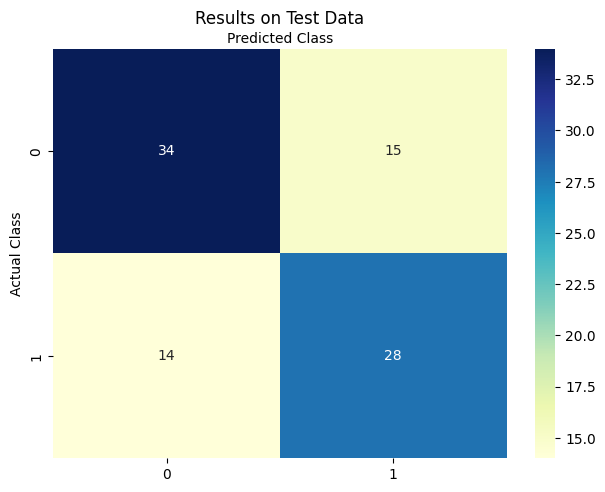

In [45]:
#heat map of accuracy - the model makes about the same number of type 1 as type 2 errors, it is also similar to the previous model
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'YlGnBu', fmt='g')
ax.xaxis.set_label_position ('top')
plt.tight_layout()
plt.title('Results on Test Data')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

The above effort did not seem to improve the model as much as we might have hoped. There are still other ways to improve Naive Bayes, though. Here is an interesting article on improving Naive Bayes: https://www.baeldung.com/cs/naive-bayes-classification-performance#:~:text=Ways%20to%20Improve%20Naive%20Bayes%20Classification%20Performance%201,3.8.%20Usage%20with%20Small%20Datasets%20...%20More%20items

Let's employ some of the techniques recommended there:

<Axes: >

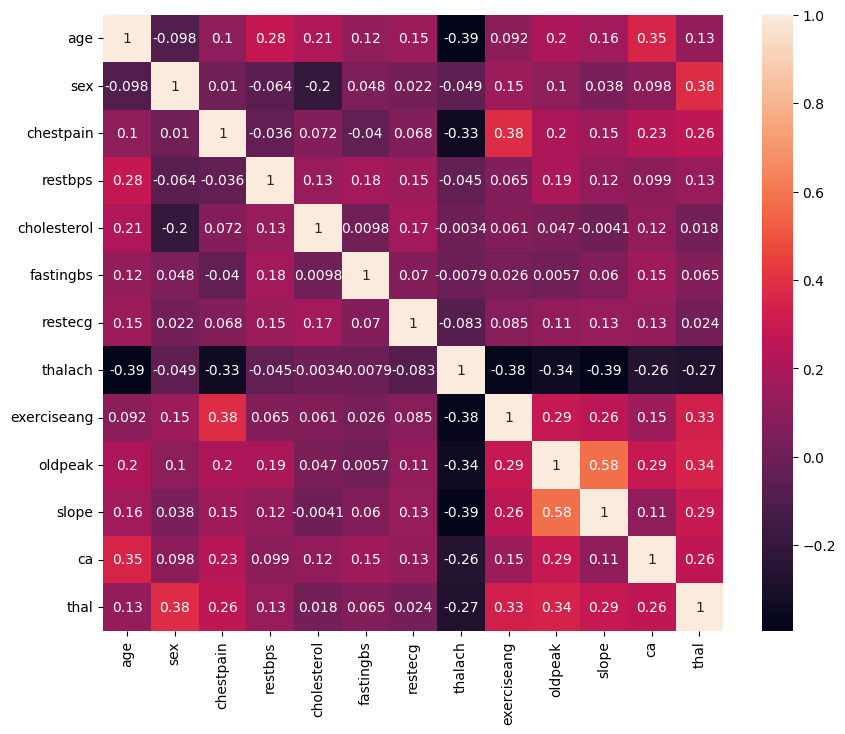

In [47]:
#Let's check the correlation matrix to see if any of our predictors might not be independent

import seaborn as sns

# calculate the correlations
correlations = predictors.corr()


plt.figure(figsize=(10, 8))
# plot the heatmap 
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)



# It seems as though oldpeak and slope have some correlation. We will drop oldpeak,since it was clearly not Gaussian when we looked at the histograms earlier
# Thalac also seems to have moderate correlation with many of the other predictors so we will drop it as well

# It seems like we are already using smoothing to counteract the zero observation problem (the function defualts to smoothing)
# It also seems that we are defualting to log probability, so for now, it seems like addressing independence is the best next step.


In [48]:
#Rerun the analysis only using continuous predictors for Gaussian Naive Bayes
#drop non-continuous predictors
predictors_cont_indep = predictors.drop(['sex', 'chestpain', 'fastingbs', 'restecg', 'exerciseang', 'slope', 'ca', 'thal', 'thalach', 'oldpeak'], axis = 'columns')

In [49]:
#split data into 30% test and 70% training, using set random state for reproducibility

x_train_cont_indep, x_test_cont_indep, y_train_cont_indep, y_test_cont_indep =  train_test_split(predictors_cont_indep,target,test_size = 0.3, random_state = 18)

In [50]:
#train the model using the Gaussian model probabilities
model_cont_indep = GaussianNB()
model_cont_indep.fit(x_train_cont_indep,y_train_cont_indep)

GaussianNB()

In [51]:
# score the accuracy of the model's predictions
accuracy_cont_indep = model_cont_indep.score(x_test_cont_indep,y_test_cont_indep)*100

In [52]:
#print the accuracy
print('the accuracy of the model with only the three independent continuous predictors is {0}%'.format(accuracy_cont_indep))

the accuracy of the model with only the three independent continuous predictors is 54.94505494505495%


Note: Since the we are not changing any of the discrete predictors, we can use the same model as before for the discrete predictors

In [53]:
#calculate the probability for each class for continuous model and discrete model
prob_cont_indep = model_cont_indep.predict_proba(x_test_cont_indep)

#multiply probabilities to find classification for combined model
prob_total = prob_cont_indep * prob_disc

In [54]:
#determine if the model will classify each test value as 0 or 1 (by figuring out if p(0) < p(1))
classification = list()
for i in range(len(prob_total)):
    classification.append(int(prob_total[i][0] < prob_total[i][1]))

#convert y_test to a list and make 1 dataframe with predicted and actual data
y_list = y_test.tolist()
df2 = pd.DataFrame(list(zip(classification, y_list)), columns = ['Predicted', 'Actual'])
print(df2)

    Predicted  Actual
0           1       1
1           0       1
2           0       1
3           1       0
4           0       1
..        ...     ...
86          0       0
87          1       0
88          0       1
89          0       0
90          0       1

[91 rows x 2 columns]


In [55]:
#create a confusion matrix for the mixed model
confusion_matrix = pd.crosstab(df2['Actual'], df2['Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted   0   1
Actual           
0          31  18
1          17  25


Text(0.5, 427.9555555555555, 'Predicted Class')

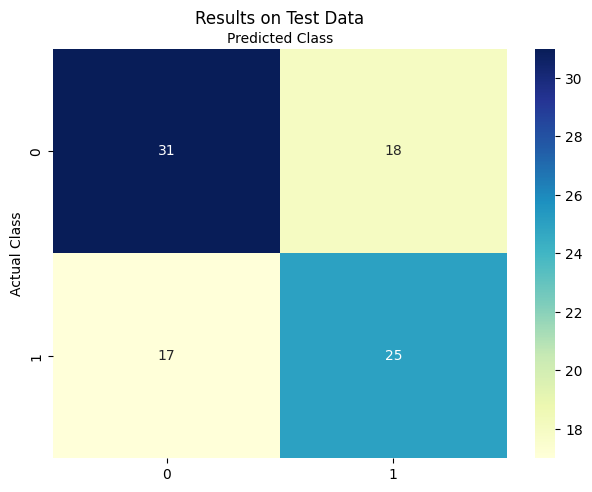

In [56]:
#heat map of accuracy - the model makes about the same number of type 1 as type 2 errors, it is also similar to the previous model
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'YlGnBu', fmt='g')
ax.xaxis.set_label_position ('top')
plt.tight_layout()
plt.title('Results on Test Data')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

In [ ]:
As you can see in the above confusion matrix, the new model seems to be performing worse than the original. However, we are now following more of the original model assumptions that Naive Bayes makes. This leads us to the interesting dilema: is it more important to follow model assumptions or to make the most accurate model?

This question leads to certain ethical questions. It seems important to consider context. For example, we could potentially improve the results of the above model by changing the seed we set when making our training and test sets. However, intentionnally picking and choosing a seed because the results look "better", is clearly an ethical violation and an act that priortizes the apprearance of how our model is performing over the actual model. So, making the most accurate appearing model should not be our top priority. We have to consider the true accuracy of the model, which we will never be able to measure. 

Sometimes, however, we might be able to improve our adherence to model assumptions and simultaneously improve the model. For example, instead of dropping data that does not fit our model assumptions we might be able to switch our model type, to one that does not require independence or Guassian models. This could either be another model we have learned in class or we could slightly alter the Naive Bayes model to not depend on these assumptions. These alterations would require a firm understanding of modeling in Bayesian Statistics. 